# Protein Consumption - Principal Component Analysis (PCA)
- Author: Oliver Mueller
- Last update: 26.01.2024

## Initialize notebook
Load required packages. Set up workspace, e.g., set theme for plotting and initialize the random number generator.

In [6]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
plt.style.use('fivethirtyeight')

## Problem description

We have data about the protein consumption in twenty-five European countries for nine food groups. We want to find out whether there are any groups of countries with similar protein consumption patterns. 

## Load data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/olivermueller/vhbprodok_datascience/main/protein/data/protein.txt', sep='\t')

In [4]:
data.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


## Prepare data

Drop the catgeorical variable `Country` and scale the data.

In [7]:
data_prep = data.drop(['Country'], axis=1) 

In [8]:
scaler = StandardScaler()
data_prep = scaler.fit_transform(data_prep)
data_prep = pd.DataFrame(data_prep, columns=data.columns[1:])

In [9]:
data_prep.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
1,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
2,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
3,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
4,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


## PCA

Perform PCA on the scaled data and extract the two first principal components.

In [33]:
pca = PCA(n_components=2)
pca.fit(data_prep)

PCA(n_components=2)

How much of the variance is explained by the first two principal components?

In [34]:
print(pca.explained_variance_ratio_)

[0.44515973 0.18166661]


Show the loadings of the first two principal components on the original variables.

In [41]:
pca.components_

array([[-0.30260939, -0.31055622, -0.42667851, -0.37772728, -0.1356499 ,
         0.43774343, -0.29724767,  0.4203344 ,  0.11041989],
       [-0.05625165, -0.23685334, -0.03533576, -0.18458877,  0.6468197 ,
        -0.23348508,  0.35282564,  0.14331056,  0.53619004]])

In [38]:
pd.DataFrame(pca.components_.transpose(), columns=['PC1', 'PC2'], index=data.columns[1:])

,PC1,PC2
RedMeat,-0.302609,-0.056252
WhiteMeat,-0.310556,-0.236853
Eggs,-0.426679,-0.035336
Milk,-0.377727,-0.184589
Fish,-0.135650,0.646820
Cereals,0.437743,-0.233485
Starch,-0.297248,0.352826
Nuts,0.420334,0.143311
Fr&Veg,0.110420,0.536190


Extract the scores of the first two principal components for each country and attach them to the original data frame.

In [30]:
pcs = pca.transform(data_prep)
pcs = pd.DataFrame(pcs[:,0:2], columns=['PC1', 'PC2'])
data_w_pcs = pd.concat([data, pcs], axis=1)


In [32]:
data_w_pcs

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,PC1,PC2
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,3.557238,-1.664102
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,-1.452006,-1.062702
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,-1.655480,0.162784
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,3.198708,-1.327895
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,-0.378104,-0.615096
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,-2.414042,0.291332
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,-1.451538,0.459586
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,-1.596104,-0.608293
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,-1.518666,0.801560
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,2.285884,1.021701


## Visualize

Create a scatter plot of the scores of the first two principal components

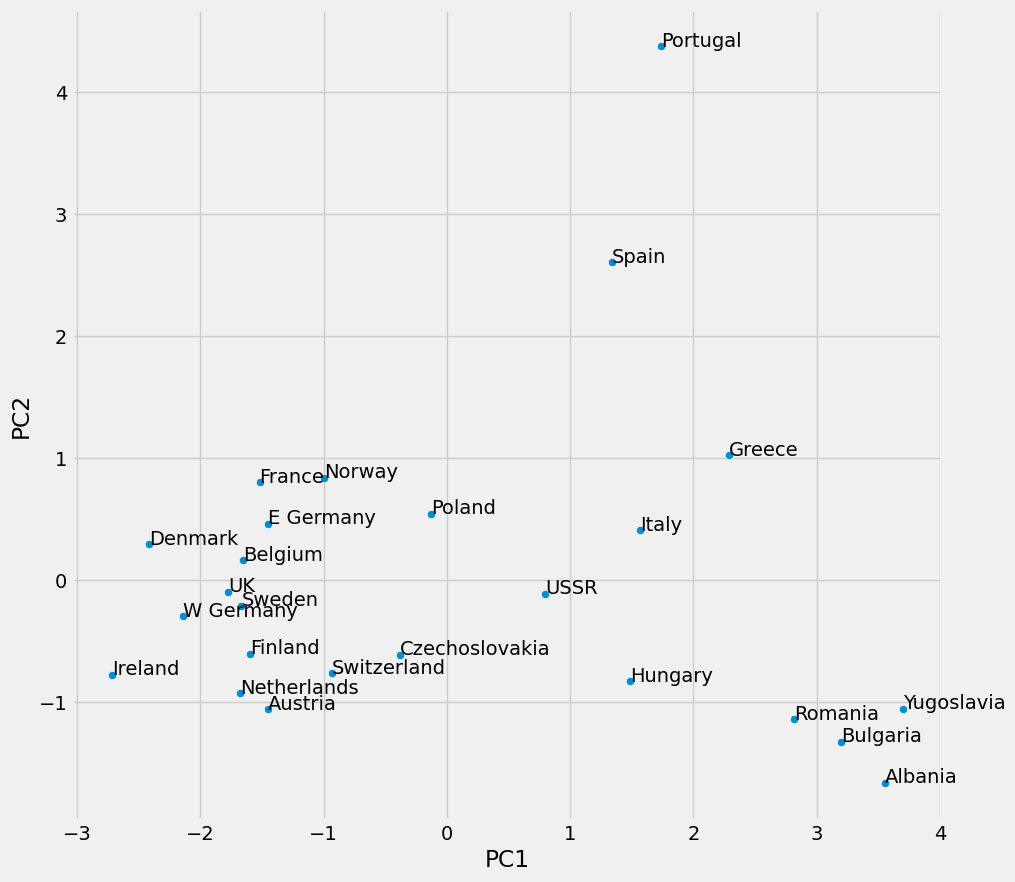

In [52]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_w_pcs, x='PC1', y='PC2', legend=False)
for i in range(len(data_w_pcs)):
    plt.text(data_w_pcs["PC1"][i], data_w_pcs["PC2"][i], data_w_pcs["Country"][i])
plt.show()